In [1]:
import numpy as np 
import pandas as pd 
import keras_tuner as kt


In [2]:
df = pd.read_csv('DATA/pima-indians-diabetes.csv')

In [3]:
# assign columns to the dataset
df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.corr()['Outcome']

Pregnancies                 0.221087
Glucose                     0.465856
BloodPressure               0.064882
SkinThickness               0.073265
Insulin                     0.131984
BMI                         0.292695
DiabetesPedigreeFunction    0.173245
Age                         0.236417
Outcome                     1.000000
Name: Outcome, dtype: float64

In [10]:
df.drop(columns=['BloodPressure','SkinThickness'], inplace=True)

In [11]:
X= df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [12]:
X

array([[1.00e+00, 8.50e+01, 0.00e+00, 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 0.00e+00, 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 9.40e+01, 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 1.12e+02, 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 0.00e+00, 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 0.00e+00, 3.04e+01, 3.15e-01, 2.30e+01]])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X= scaler.fit_transform(X)


In [16]:
X.shape

(767, 6)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [27]:
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu', input_shape=(6,))) ## clueless part 
model.add(Dense(1, activation='sigmoid')) ## clueless part

In [28]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) ## clueless part


In [29]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 7s 17ms/step - loss: 0.5723 - accuracy: 0.7406 - val_loss: 0.5543 - val_accuracy: 0.7597
Epoch 2/100
62/62 [==============================] - 1s 11ms/step - loss: 0.5091 - accuracy: 0.7700 - val_loss: 0.5171 - val_accuracy: 0.7597
Epoch 3/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4824 - accuracy: 0.7749 - val_loss: 0.5009 - val_accuracy: 0.7792
Epoch 4/100
62/62 [==============================] - 1s 12ms/step - loss: 0.4706 - accuracy: 0.7879 - val_loss: 0.4934 - val_accuracy: 0.7792
Epoch 5/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4633 - accuracy: 0.7830 - val_loss: 0.4901 - val_accuracy: 0.7922
Epoch 6/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4597 - accuracy: 0.7749 - val_loss: 0.4871 - val_accuracy: 0.7792
Epoch 7/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4576 - accuracy: 0.7830 - val_loss: 0.4860 - val_accuracy: 0.7792
Epoch 

# how to select apporpriate optimizer, loss function, metrics, epochs, batch size, validation split, neuron , hidden layers etc.

## finding best optimiser


In [30]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta','nadam'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
      
        

In [19]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [20]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [21]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [22]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = tuner.get_best_models(num_models=1)[0]

In [24]:

model.fit(X_train, y_train, epochs=100, batch_size=10, initial_epoch=6,validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 7/100
62/62 [==============================] - 2s 15ms/step - loss: 0.4871 - accuracy: 0.7635 - val_loss: 0.4774 - val_accuracy: 0.7922
Epoch 8/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4763 - accuracy: 0.7765 - val_loss: 0.4651 - val_accuracy: 0.7922
Epoch 9/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4706 - accuracy: 0.7732 - val_loss: 0.4610 - val_accuracy: 0.7922
Epoch 10/100
62/62 [==============================] - 1s 12ms/step - loss: 0.4657 - accuracy: 0.7749 - val_loss: 0.4560 - val_accuracy: 0.8052
Epoch 11/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4621 - accuracy: 0.7749 - val_loss: 0.4535 - val_accuracy: 0.8052
Epoch 12/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4588 - accuracy: 0.7830 - val_loss: 0.4523 - val_accuracy: 0.8117
Epoch 13/100
62/62 [==============================] - 1s 11ms/step - loss: 0.4567 - accuracy: 0.7781 - val_loss: 0.4513 - val_accuracy: 0.8117
Ep

## finding no of neurons in a layer 


In [25]:
def built_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value=16, max_value=128, step=16)
    model.add(Dense(units= units, activation='relu', input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [26]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [27]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

In [30]:
model = tuner.get_best_models(num_models=1)[0]

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlystopping_history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[es])


Epoch 1/100
49/49 [==============================] - 1s 13ms/step - loss: 0.3476 - accuracy: 0.8408 - val_loss: 0.3097 - val_accuracy: 0.8699
Epoch 2/100
49/49 [==============================] - 1s 11ms/step - loss: 0.3470 - accuracy: 0.8469 - val_loss: 0.3184 - val_accuracy: 0.8537
Epoch 3/100
49/49 [==============================] - 1s 10ms/step - loss: 0.3469 - accuracy: 0.8408 - val_loss: 0.3206 - val_accuracy: 0.8374
Epoch 4/100
49/49 [==============================] - 1s 12ms/step - loss: 0.3453 - accuracy: 0.8490 - val_loss: 0.3217 - val_accuracy: 0.8374
Epoch 5/100
49/49 [==============================] - 1s 12ms/step - loss: 0.3466 - accuracy: 0.8469 - val_loss: 0.3267 - val_accuracy: 0.8455
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.3437 - accuracy: 0.8490 - val_loss: 0.3255 - val_accuracy: 0.8374


In [37]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, initial_epoch=6,validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 7/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4036 - accuracy: 0.8173 - val_loss: 0.4795 - val_accuracy: 0.7727
Epoch 8/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4039 - accuracy: 0.8059 - val_loss: 0.4794 - val_accuracy: 0.7727
Epoch 9/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4029 - accuracy: 0.8206 - val_loss: 0.4777 - val_accuracy: 0.7727
Epoch 10/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4020 - accuracy: 0.8173 - val_loss: 0.4813 - val_accuracy: 0.7727
Epoch 11/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4015 - accuracy: 0.8189 - val_loss: 0.4805 - val_accuracy: 0.7727
Epoch 12/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4012 - accuracy: 0.8124 - val_loss: 0.4823 - val_accuracy: 0.7727
Epoch 13/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4021 - accuracy: 0.8108 - val_loss: 0.4816 - val_accuracy: 0.7727
Ep

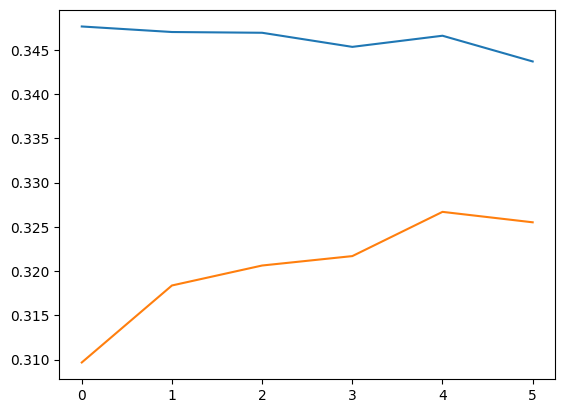

In [41]:
import matplotlib.pyplot as plt
plt.plot(earlystopping_history.history['loss'],label='train')
plt.plot(earlystopping_history.history['val_loss'], label='test')
plt.show()

## How to select no of layers 


In [19]:
def build_model(hp):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(72, activation='relu', input_shape=(8,)))
    
    # Tune number of additional hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16), ## no of neurons in every layer 
            activation='relu'
        ))
    
    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [20]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,project_name='my_tuner')

In [21]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), initial_epoch=6)

Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 01m 28s


In [22]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units_0': 64,
 'optimizer': 'rmsprop',
 'units_1': 112,
 'units_2': 16,
 'units_3': 16}

In [24]:
model = tuner.get_best_models(num_models=1)[0]

In [25]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, initial_epoch=6,validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 7/200
62/62 [==============================] - 3s 20ms/step - loss: 0.4647 - accuracy: 0.7732 - val_loss: 0.4665 - val_accuracy: 0.7792
Epoch 8/200
62/62 [==============================] - 1s 15ms/step - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.4770 - val_accuracy: 0.7792
Epoch 9/200
62/62 [==============================] - 1s 15ms/step - loss: 0.4402 - accuracy: 0.7798 - val_loss: 0.4935 - val_accuracy: 0.7727
Epoch 10/200
62/62 [==============================] - 1s 15ms/step - loss: 0.4267 - accuracy: 0.7993 - val_loss: 0.4812 - val_accuracy: 0.7792
Epoch 11/200
62/62 [==============================] - 1s 15ms/step - loss: 0.4262 - accuracy: 0.7912 - val_loss: 0.4660 - val_accuracy: 0.7922
Epoch 12/200
62/62 [==============================] - 1s 15ms/step - loss: 0.4142 - accuracy: 0.8124 - val_loss: 0.4825 - val_accuracy: 0.7792
Epoch 13/200
62/62 [==============================] - 1s 16ms/step - loss: 0.4035 - accuracy: 0.8189 - val_loss: 0.4629 - val_accuracy: 0.7922
Ep

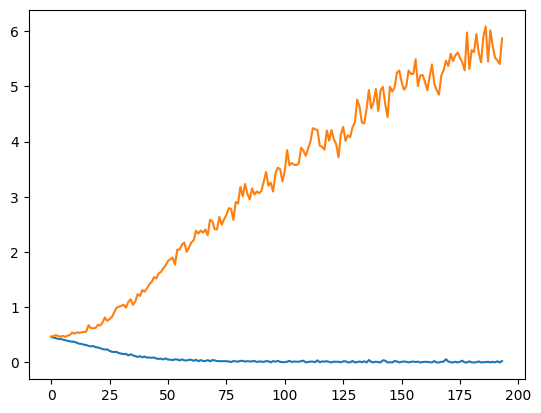

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

In [44]:
def build_model(hp):
    model = Sequential()
    
    
    count =0
    # Tune number of additional hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        
        if count==0:
            model.add(
                Dense(
                    units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16), ## no of neurons in every layer 
                    activation= hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_shape=(6,)
                )
            )
            count+=1
        else:
            model.add(
                Dense(
                    units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16), ## no of neurons in every layer 
                    activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [45]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,project_name='final_tuner')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.00001, 
    patience=20, 
    verbose=1,
    mode = 'auto',
    baseline= None,
    restore_best_weights = False
)

In [48]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), initial_epoch=6)

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 01m 18s


In [49]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units_0': 112,
 'activation_0': 'sigmoid',
 'optimizer': 'adam',
 'units_1': 32,
 'activation_1': 'tanh',
 'units_2': 80,
 'activation_2': 'sigmoid'}

In [50]:
model = tuner.get_best_models(num_models=1)[0]

In [51]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10,callbacks = callback, initial_epoch=6,validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 7/200
62/62 [==============================] - 2s 18ms/step - loss: 0.4911 - accuracy: 0.7586 - val_loss: 0.4635 - val_accuracy: 0.7662
Epoch 8/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4883 - accuracy: 0.7586 - val_loss: 0.4686 - val_accuracy: 0.8052
Epoch 9/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4874 - accuracy: 0.7635 - val_loss: 0.4581 - val_accuracy: 0.7727
Epoch 10/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4791 - accuracy: 0.7732 - val_loss: 0.4540 - val_accuracy: 0.7922
Epoch 11/200
62/62 [==============================] - 1s 11ms/step - loss: 0.4846 - accuracy: 0.7684 - val_loss: 0.4670 - val_accuracy: 0.8052
Epoch 12/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4843 - accuracy: 0.7586 - val_loss: 0.4598 - val_accuracy: 0.7727
Epoch 13/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4734 - accuracy: 0.7732 - val_loss: 0.4614 - val_accuracy: 0.7727
Ep

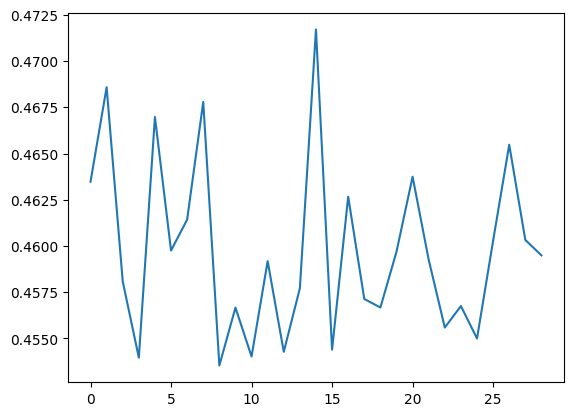

In [52]:
import matplotlib.pyplot as plt
# plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

In [53]:
ypred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
confusion_matrix(y_test, ypred.round())

array([[81, 16],
       [17, 40]], dtype=int64)

<Axes: >

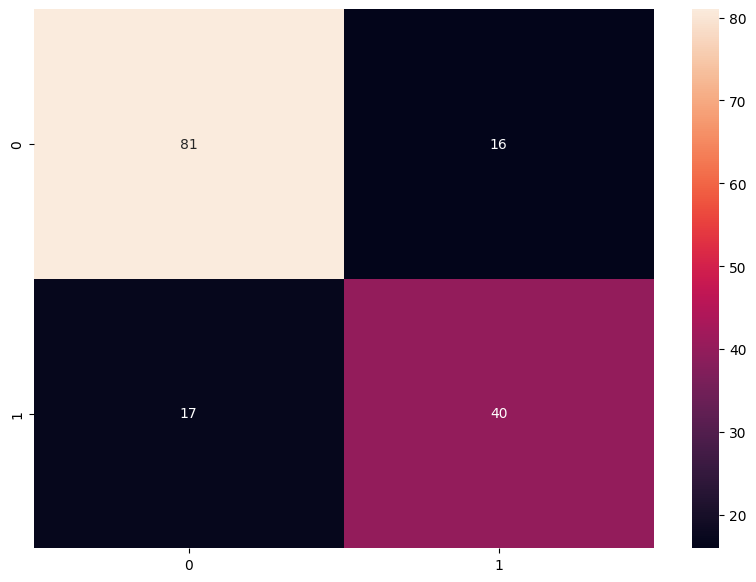

In [56]:
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, ypred.round()), annot=True)
